<a href="https://colab.research.google.com/github/dantebarross/scientific-projects-with-python/blob/main/Awesome_mathy_stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Awesome mathy stuff

Being able to translate math equations and math concepts into code is REALLY important to become a good scientist.

## Pascal's triangle

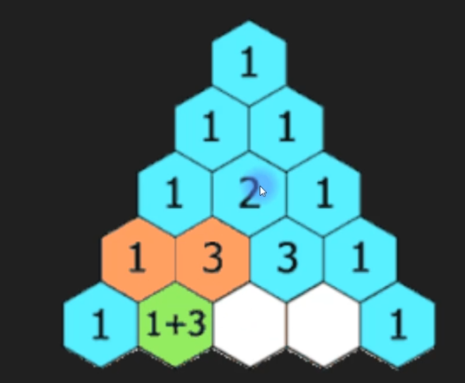

Pascal's triangle is used sometimes in linear algebra for linear systems. But what we need to do here is create and display this "triangle", with ones around the borders, and then each element defined by the sum of the two elemets on top of it.

The formula to compute this, binomial coefficient:

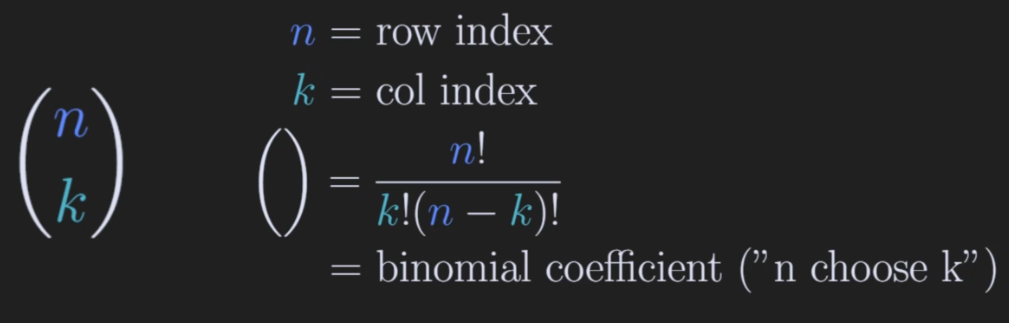

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def n_choose_k(n, k):
  numerator = math.factorial(n)
  denominator = math.factorial(k) * math.factorial(n-k)
  return numerator / denominator

In [ ]:
# let's specify the size of the matrix
pascal_size = 5    # 5 x 5 matrix
pascal_triangle = np.zeros((pascal_size, pascal_size), dtype=int)

for n in range(pascal_size):
  for k in range(n + 1):
    pascal_triangle[n, k] = n_choose_k(n, k)

In [ ]:
pascal_triangle

array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 2, 1, 0, 0],
       [1, 3, 3, 1, 0],
       [1, 4, 6, 4, 1]])

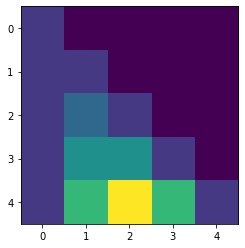

In [ ]:
plt.imshow(pascal_triangle)
plt.show()

In [ ]:
for i in range(pascal_size):
  temp = pascal_triangle[i, :]
  temp = temp[temp != 0] # not equal zero, preserving only non-zero elements
  print(' ' * (pascal_size - i ) + np.array2string(temp)[1:-1])

     1
    1 1
   1 2 1
  1 3 3 1
 1 4 6 4 1


## Euler's identity

Let's explore Euler's identity, sometimes called euler's formula too!

We are going to see it with algebraic sense and geometric sense.

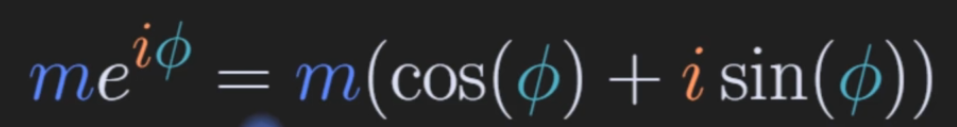

"m" is any natural number, "e" is the natural exponent, "i" is the imaginary operator (square root of -1), "phee" is any real number (positive or negative).

In [ ]:
# Selecting random numbers
m = 7
p = np.pi / 4

# Euler notation
euler = m * np.exp(1j * p) # math notation is "i" but in python we use "1j"

# Rectangular notation
rectangular = m * (np.cos(p) + 1j * np.sin(p))

print(euler)
print(rectangular)

(4.949747468305833+4.949747468305832j)
(4.949747468305833+4.949747468305832j)


7.384999999999999


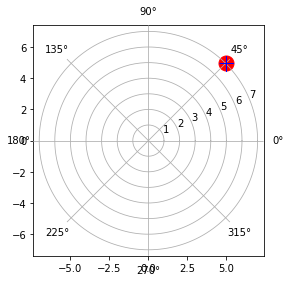

In [ ]:
fig = plt.figure()

ax_cart = fig.add_axes([.1, .1, .8, .8])
ax_polar = fig.add_axes([.1, .1, .8, .8], polar=True, frameon=False)

# Drawing the two plots
ax_polar.plot(theta, radius, 'b+', markersize=15)
ax_cart.plot(x, y, 'ro', markersize=15)

r = ax_polar.get_rmax() # outer radial limit (maximum radius of the graph)
print(r)

ax_cart.set_xlim([-r, r])
ax_cart.set_ylim([-r, r])
ax_cart.set_aspect(1 / ax_cart.get_data_ratio()) # making the graph a square

plt.show()

## Parameterized Gaussian

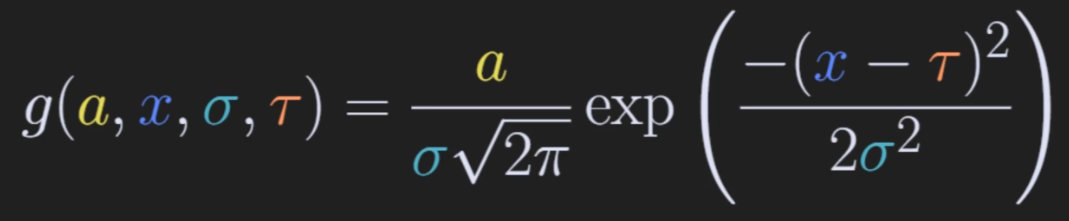

Okay, this is a really long formula! **sighs

What's this?

This is the full formula for a Gaussian (standard bell curve/normal distribution).

But we can also resume to the essence of Gaussian:

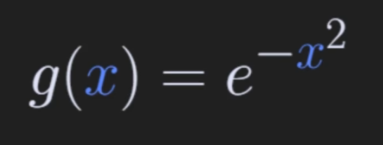

The challenge here is to implement the full formula in code, and its parameters a (amplitude), sigma, x (is a vector), Tau.

Let's also implement the formula in a function to allow an easy use.

In [ ]:
x = np.linspace(-10, 10, 1001)

def make_gaussian(amp, sigma, tau=0):
  gaussian = amp / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - tau) ** 2 / (2 * sigma**2))
  return gaussian

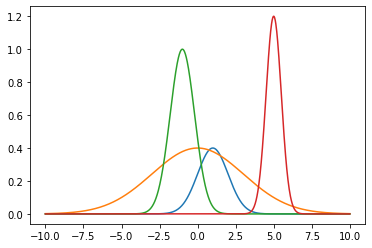

In [ ]:
plt.plot(x, make_gaussian(1, 1, 1));
plt.plot(x, make_gaussian(3, 3));
plt.plot(x, make_gaussian(2, .8, -1));
plt.plot(x, make_gaussian(1.5, .5, 5));

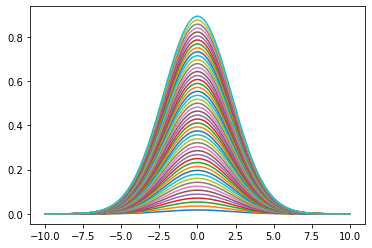

In [ ]:
amps = np.linspace(.1, 5, 50)

gaussian_matrix = np.zeros((len(amps), len(x))) # starting a matrix
                           
for a in range(len(amps)):
  gaussian_matrix[a, :] = make_gaussian(amps[a], 2.23425)

plt.plot(x, gaussian_matrix.T);

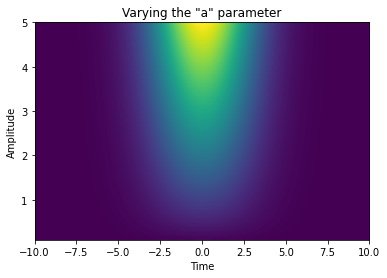

In [ ]:
plt.imshow(gaussian_matrix, aspect='auto', extent=[x[0], x[-1], amps[0], amps[-1]], origin='lower')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Varying the "a" parameter')
plt.show()

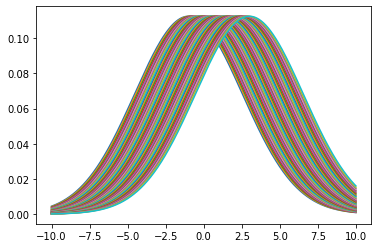

In [ ]:
taus = np.linspace(-1, 3, 50)

gaussian_matrix = np.zeros((len(taus), len(x))) # starting a matrix
                           
for a in range(len(taus)):
  gaussian_matrix[a, :] = make_gaussian(1, 3.54687, taus[a])

plt.plot(x, gaussian_matrix.T);

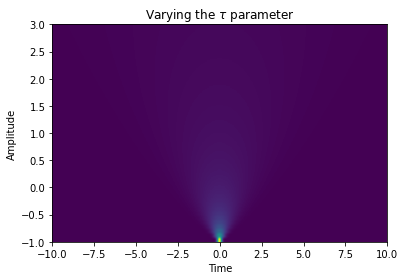

In [ ]:
plt.imshow(gaussian_matrix, aspect='auto', extent=[x[0], x[-1], taus[0], taus[-1]], origin='lower')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Varying the $\\tau$ parameter')
plt.show()

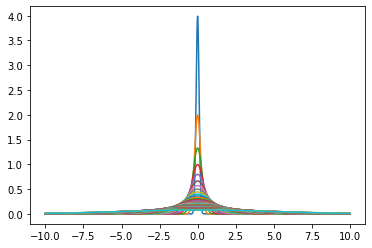

In [ ]:
sigmas = np.linspace(.1, 5, 50)

gaussian_matrix = np.zeros((len(sigmas), len(x))) # starting a matrix
                           
for a in range(len(sigmas)):
  gaussian_matrix[a, :] = make_gaussian(1.000001, sigmas[a])

plt.plot(x, gaussian_matrix.T);

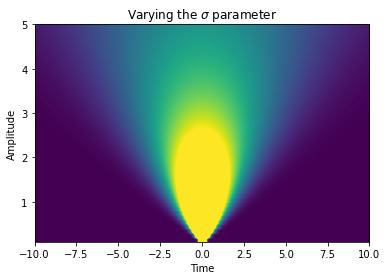

In [ ]:
plt.imshow(gaussian_matrix, aspect='auto', 
           extent=[x[0], x[-1], sigmas[0], sigmas[-1]], 
           origin='lower', vmax=.15)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Varying the $\\sigma$ parameter')
plt.show()

## Eigenvalues on the complex circle

We  are going to explore interesting properties of random number matrices, and looking at the distribution of eigenvalues of random numbers matrices.

Eigen decomposition (eigenvalue) or Eigenvalue decomposition is a procedure that we can apply to matrices that have the same number of rows and columns (squared matrices).

A square matrix is going to have eigenvalues and eigenvectors, and they come in pairs.

If a matrix is a 15 x 15, then there are going to have 15 eigenvalues. And each one paired with a corresponding eigenvector.

The eigenvalues all live inside of a sphere of unit radius.

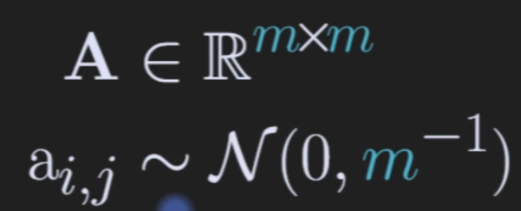

The matrix "A" is defined as a real number matrix and is a squared matrix.

For individual values of matrix, "a", in "i"'th row and "j"'th column of "A", a normal distribution (or Gaussian standard distribution) with a mean of zero and variance of "m" to the power of -1 (1 / "m"), 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

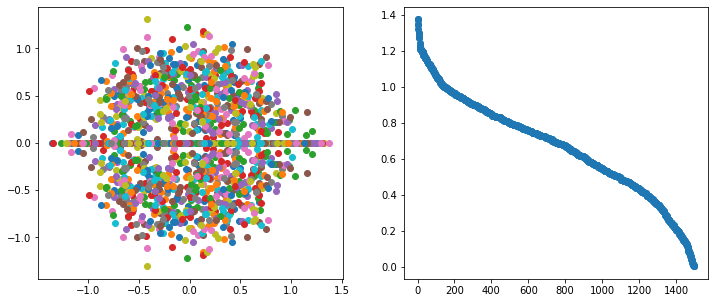

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

n = 15
mags = []

for i in range(100): # generating 100 times
  # random number matrix
  A = np.random.randn(n, n) / np.sqrt(n) # np.sqrt(n) -> standard deviation

  # you get eigenvalues and eigenvectors, but we don't care here about eigenvectors, only eigenvalues position [0] of vector below
  L = np.linalg.eig(A)[0]

  mags = np.concatenate((mags, np.abs(L)))

  ax[0].plot(np.real(L), np.imag(L), 'o')

mags.sort()
ax[1].plot(mags[::-1], 'o')

plt.show()

## I heart math

Creating two vectors "x" and "y" based on the formula below. Implementing into a graph.

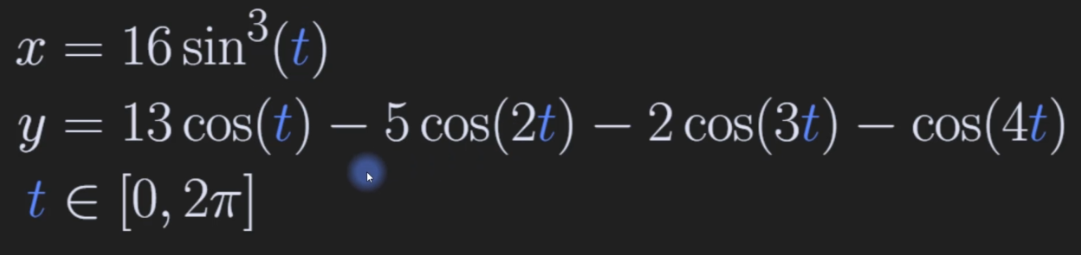

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

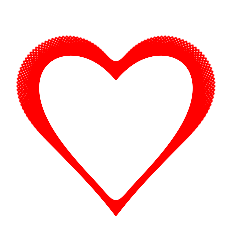

In [26]:
t = np.linspace(0, np.pi * 50, 200)
x = 16 * np.sin(t)**3
y = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)

plt.plot(x, y, 'r')
plt.axis('square')
plt.axis('off')
plt.show()